<h1>Pandas Jupiter Experiment


<h2>Stage one: Import Libraries/Data</h2>
    <h5>This data set includes vaccine myths compiled from reddit.</h5>
 <ol>
     <li> Import all the needed libraries</li>
     <li> Create a dataframe object from a csv file.</li>
     <li> Replace null values with 'No data available'</li> 
     <li> Sample the data </li>
  </ol>


In [574]:
import pandas as pd
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

vacmyth_df = pd.read_csv('/Users/nada/git/Design-and-Development/week5/reddit_vm.csv', delimiter=",")

vacmyth_df['body'] = vacmyth_df['body'].fillna('No data available')

vacmyth_df.sample(20)

,title,score,id,url,comms_num,created,body,timestamp
549,"The toll of the anti-vaccination movement, in ...",13,1vvac1,http://www.latimes.com/business/hiltzik/la-fi-...,1,1.390415e+09,No data available,2014-01-22 20:23:57
753,Comment,1,glha29j,NaN,0,1.612101e+09,They had a web site that asked about 10 basic ...,2021-01-31 15:57:17
655,Comment,1,gy40woq,NaN,0,1.621007e+09,"What's my motivation for lying, my only motiva...",2021-05-14 18:43:31
208,If I drink alcohol the day before or the after...,7,gnivbp,https://www.reddit.com/r/VaccineMyths/comments...,1,1.590005e+09,No data available,2020-05-20 23:10:47
1499,Comment,1,emzwea5,NaN,0,1.557472e+09,I like you,2019-05-10 10:04:14
1232,Comment,1,f4gei4i,NaN,0,1.571580e+09,Yea lol,2019-10-20 17:04:15
297,And the Gish is Galloping!!,7,6ob6w6,https://np.reddit.com/r/conspiracy/comments/6o...,1,1.500495e+09,No data available,2017-07-19 23:17:27
1151,Comment,-2,f8te0e6,NaN,0,1.574801e+09,Chicken pox vaccine hella does.,2019-11-26 22:50:10
680,Comment,2,gvq8gnr,NaN,0,1.619285e+09,I’d be more worried about the person she sees ...,2021-04-24 20:15:55
300,Vegan mother forced by High Court to vaccinate...,10,642mfl,http://www.independent.co.uk/news/uk/home-news...,2,1.491594e+09,No data available,2017-04-07 22:37:18


<h1> Stage Two: Display a Summary and Sub-sections of the Data</h1>
    <ol>
    <li>Show the number of postings and the number of persons who posted</li> 
     <li> Show min, max, average score, and each unique score, </li>
    </ol>

In [575]:

print( "Total Number of Postings: " + str(len(vacmyth_df)) )
print( "Total Number of unique persons who posted: " + str(len(vacmyth_df['id'].unique())))
print( "Minimum score of each post: " + str(vacmyth_df['score'].min()))
print( "Maximum score of each post: " + str(vacmyth_df['score'].max()))
print( "Average score of each post: " + str(vacmyth_df['score'].mean()))

vacmyth_df['score'].unique()


Total Number of Postings: 1585
Total Number of unique persons who posted: 1585
Minimum score of each post: -12
Maximum score of each post: 1185
Average score of each post: 3.6586750788643534


array([   7,    2,    6,    1,    5,   10,    0,    3,    4,    8,   -6,
         -1,   13,    9,   12,   21,   11,   20,   38,   16,   17,   27,
         19,   15,   23,   18,   25,   28,   33,   29,   14,   22,   24,
         26,   42, 1185,   -4,   -2,  -12,   -5,   -3,   -9])

<h1> Stage Three: Clean Your Data </h1>
    <list>
    <li> Remove an outlier score of 1185 from the data set</li>
     <li> Create a dictionary (my_bag contains a key value pair,e.g. -1 occurs 20 times, 10 occurs 5 times etc... {  ["-1": 20], ["10": 5] } for the scores and their  frequencies</li> 
    </list>

In [582]:
for row in vacmyth_df.iterrows():
    if row[1]['score'] > 50:
        vacmyth_df= vacmyth_df.drop( index = row[0] )
print (vacmyth_df['score'].unique())        

[  7   2   6   1   5  10   0   3   4   8  -6  -1  13   9  12  21  11  20
  38  16  17  27  19  15  23  18  25  28  33  29  14  22  24  26  42  -4
  -2 -12  -5  -3  -9]


In [583]:

my_bag = {}

for g in vacmyth_df['score']:
    if not g in my_bag:
        my_bag[ g ] = 1
    else:
        my_bag[ g ] += 1

x, y = zip(*my_bag.items())

print(np.array(x))




[  7   2   6   1   5  10   0   3   4   8  -6  -1  13   9  12  21  11  20
  38  16  17  27  19  15  23  18  25  28  33  29  14  22  24  26  42  -4
  -2 -12  -5  -3  -9]


<h1>Stage Four: Plot Your Data </h1>
<ol>
    <li> Plot a pie chart of the frequencies to show the distribution of the scores, 1 is the most frequent</li>
    <li> Plot a bar chart showing number of comments each year</li>
    <li> Look for the words:vaccine, antivaxer, autism; put them in a dictionary</li>
    <li> Plot a scatterplot of the data</li>
 </ol>  
    

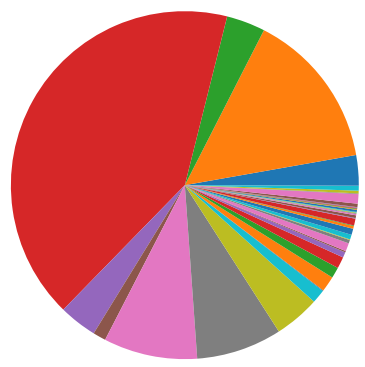

In [584]:
plt.pie(y, radius=2)
plt.show()

{'2014': 222, '2015': 54, '2016': 20, '2017': 20, '2018': 9, '2019': 702, '2020': 313, '2021': 244}


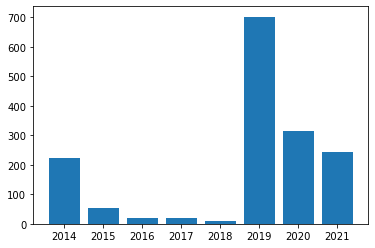

In [585]:
import matplotlib.pyplot as plt   
grouped = vacmyth_df.groupby(['timestamp']) 
my_bag = {}
for g in grouped:
    if not g[0].split('-')[0] in my_bag:
        my_bag[  g[0].split('-')[0]  ] = 1
    else:
        my_bag[  g[0].split('-')[0]  ] += 1
        
print(my_bag)
x, y = zip(*my_bag.items())
plt.bar(x,y) 
plt.show()

    
    

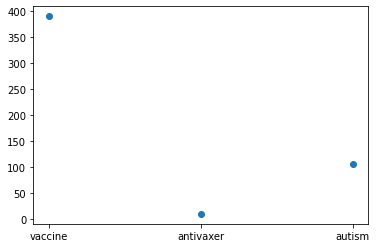

{'vaccine': 390, 'antivaxer': 10, 'autism': 105}


In [599]:
import matplotlib.pyplot as plt  
 
words = { 'vaccine' : 0 , 'antivaxer' : 0, 'autism' : 0  }

for line in vacmyth_df['body']:
    for word in words.keys():
        if line.find( word ) !=  -1:
            words[ word ] += 1
          
x, y = zip(*words.items())
plt.scatter(x, y) 
plt.show()
print(words)

<h1>Stage Five: Draw Comparisons and Make Claims</h1>
 <p>   <h4>The Reddit CSV is not perfect. I was able to analyze it in terms of contents of the commentaries. I searched for the frequency of occurrence of words of interest, such as vaccine, antivaxer, and autism. The data has titles that were useful for giving me an idea of the contents. I used the column titles to examine the data in terms of keywords. The CSV file was loaded into a dataframe and contained, among others, numerical entries, namely timestamp and score. I split the timestamp to get the years of the comments posted and plotted it. The scores are not really meaningful since I was unable to understand for sure if they signified the number of comments, or a score for the comments in terms of negative or positive review.</h4>
 </p>

<h1>Bonus: Export a Meaningful Visualization</h1>
    <h4> Display a wordcloud of the dataframe to show the most occurring words.</h4>

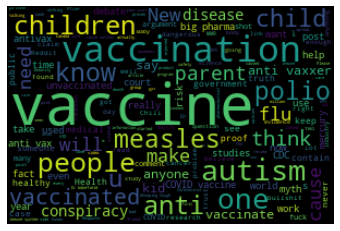

In [533]:
text = ' '.join(map(str, vacmyth_df['title'].unique()))

wordcloud = WordCloud(width=300, height=200).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()